<a href="https://colab.research.google.com/github/ritu-yadav/Disease-Prediction/blob/main/Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

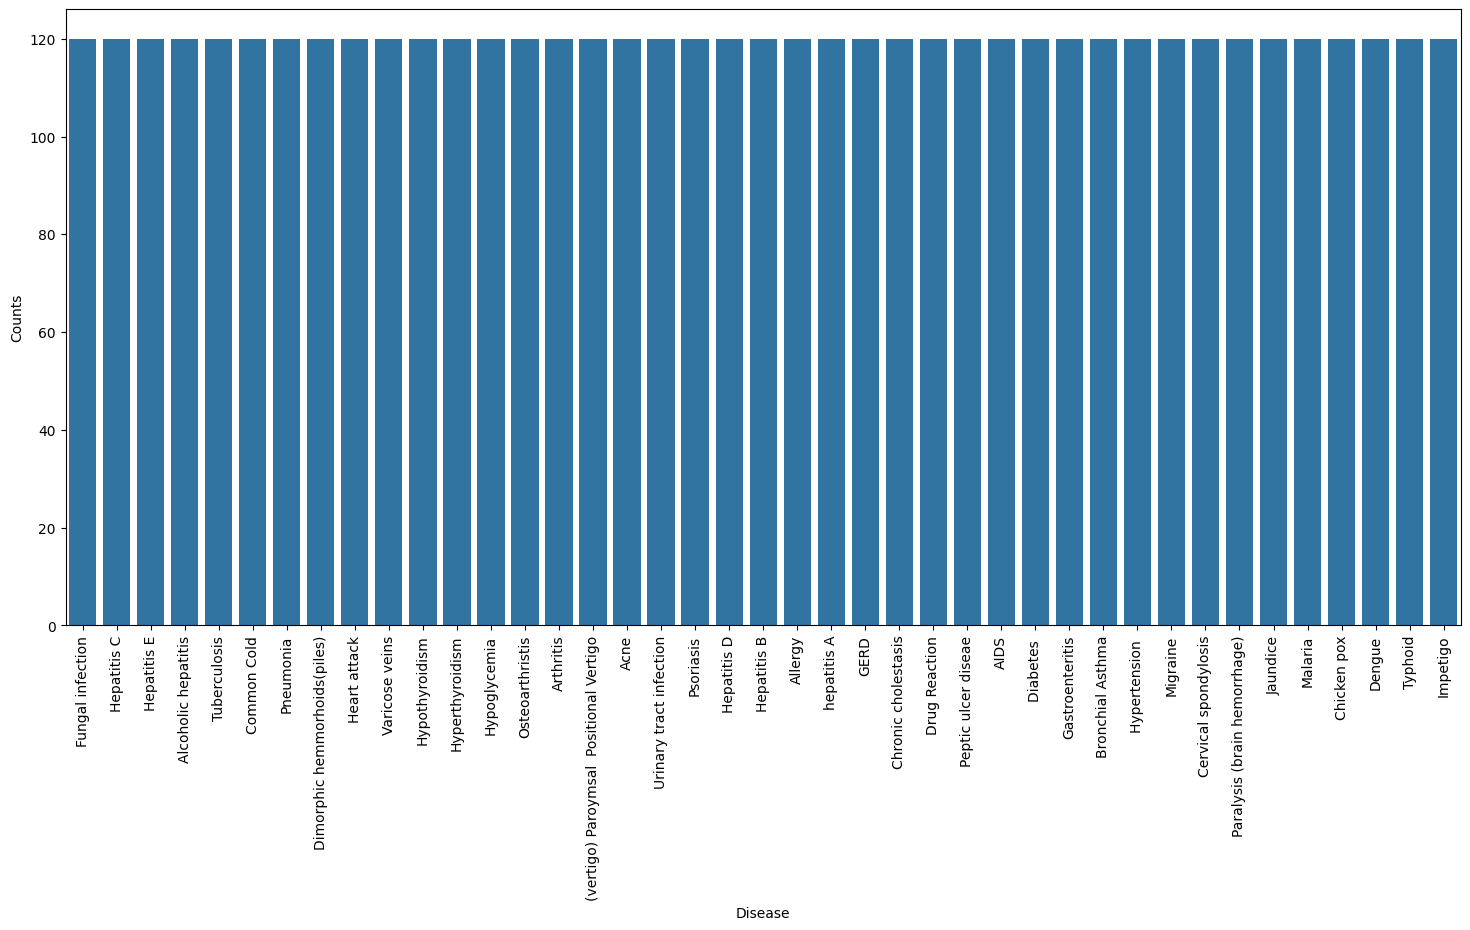

Train:(3936, 132),(3936,)
Test:(984, 132),(984,)
SVC
Scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:1.0
GaussianNB
Scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:1.0
RandomForestClassifier
Scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:1.0
accuracy on train data by SVM classifier\: 100.0
Accuracy on test data by SVM classifier\: 100.0


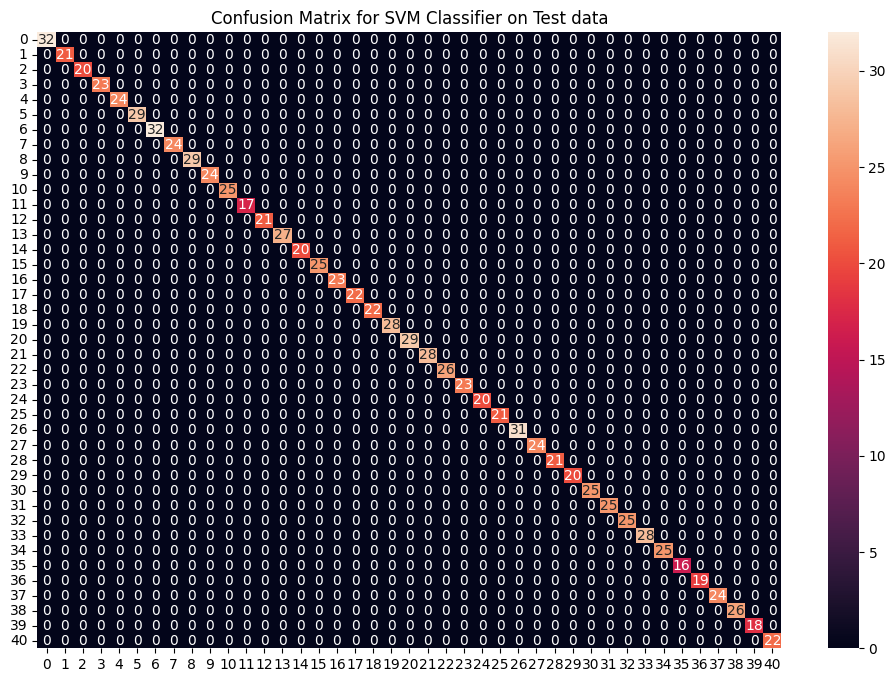

Accuracy on train data by Naive Bayes classifier :100.0 
Accuracy on test data by Navie Bayes classifier :1.0


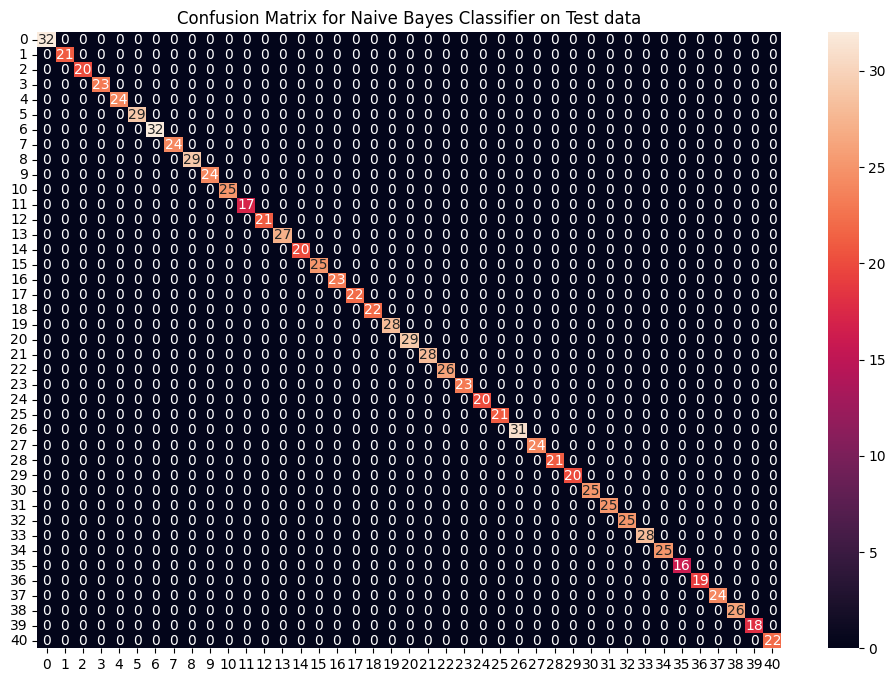

Accuracy on train data by Random Forest classifier :100.0
Accuracy on test data by Random Forest classifier :100.0


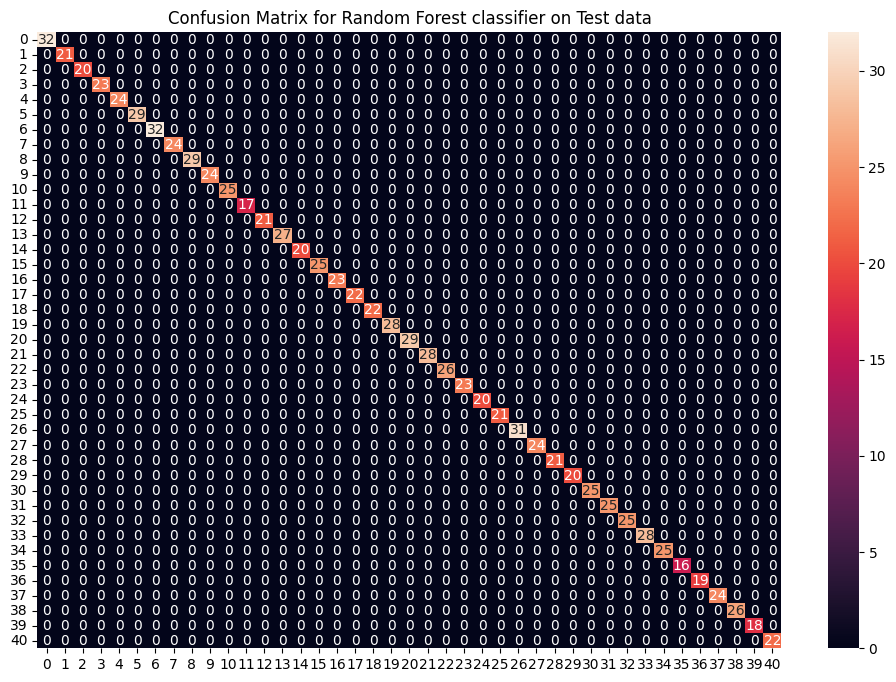

Accuracy on Test dataset by the combined model :100.0


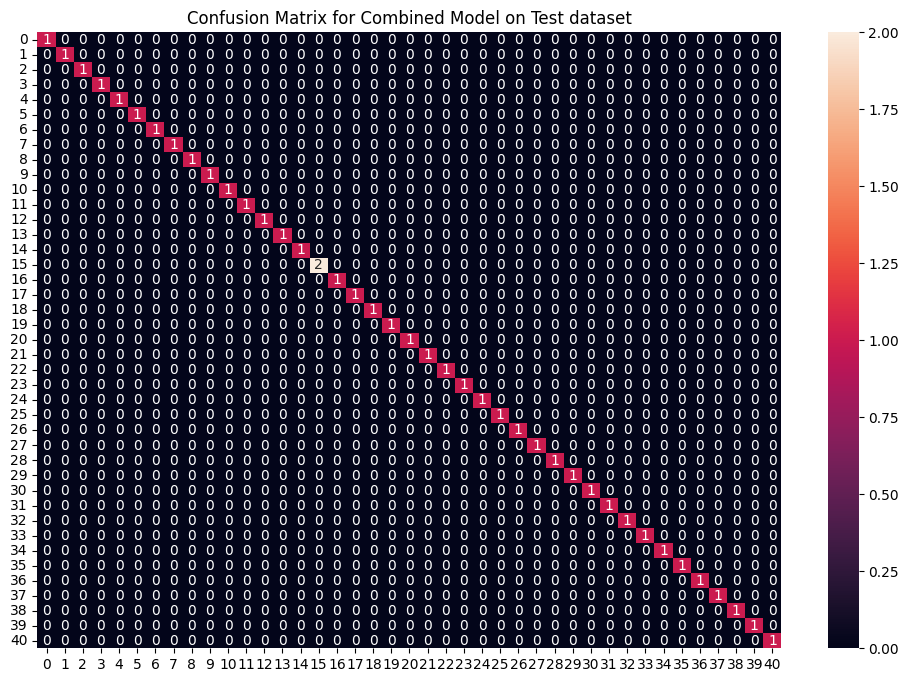

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

DATA_PATH ="dataset/Training.csv"
data =pd.read_csv(DATA_PATH).dropna(axis=1)
disease_counts =data["prognosis"].value_counts()
temp_df =pd.DataFrame({
    "Disease" : disease_counts.index,
    "Counts" : disease_counts.values
})

plt.figure(figsize=(18,8))
sns.barplot(x="Disease",y="Counts",data =temp_df)
plt.xticks(rotation=90)
plt.show()

encoder =LabelEncoder()
data["prognosis"]=encoder.fit_transform(data['prognosis'])


X= data.iloc[:,:-1]
y= data.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

print(f"Train:{X_train.shape},{y_train.shape}")
print(f"Test:{X_test.shape},{y_test.shape}")

#Using K-Fold Cross-Validation for model selection
def cv_scoring(estimator,X,y):
  return accuracy_score(y,estimator.predict(X))

models ={
    "SVC" : SVC(),
    "GaussianNB" : GaussianNB(),
    "RandomForestClassifier" : RandomForestClassifier(random_state=18)
}

for model_name in models :
  model =models[model_name]
  scores =cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring=cv_scoring)
  print("=="*30)
  print(model_name)
  print(f"Scores:{scores}")
  print(f"Mean Score:{np.mean(scores)}")

svm_model =SVC()
svm_model.fit(X_train,y_train)
preds =svm_model.predict(X_test)

print(f"accuracy on train data by SVM classifier\: {accuracy_score(y_train,svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM classifier\: {accuracy_score(y_test,preds)*100}")
cf_matrix =confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test data")
plt.show()

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
preds =nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes classifier :{accuracy_score(y_train,nb_model.predict(X_train))*100} ")
print(f"Accuracy on test data by Navie Bayes classifier :{accuracy_score(y_test,preds)}")
cf_matrix =confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test data")
plt.show()

rf_model =RandomForestClassifier(random_state=18)
rf_model.fit(X_train,y_train)
preds =rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest classifier :{accuracy_score(y_train,rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest classifier :{accuracy_score(y_test,preds)*100}")
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Random Forest classifier on Test data")
plt.show()


final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model =RandomForestClassifier(random_state=18)
final_svm_model.fit(X,y)
final_nb_model.fit(X,y)
final_rf_model.fit(X,y)

test_data = pd.read_csv("dataset/Testing.csv").dropna(axis=1)
test_X = test_data.iloc[:,:-1]
test_Y = encoder.transform(test_data.iloc[:,-1])

svm_preds =final_svm_model.predict(test_X)
nb_preds= final_nb_model.predict(test_X)
rf_preds =final_rf_model.predict(test_X)

from scipy import stats
final_preds =[stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds,nb_preds,rf_preds)]

print(f"Accuracy on Test dataset by the combined model :{accuracy_score(test_Y,final_preds)*100}")
cf_matrix =confusion_matrix(test_Y,final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Combined Model on Test dataset")
plt.show()

symptoms = X.columns.values

symptom_index = {}

for index,value in enumerate(symptoms):
  symptom = " ".join([i.capitalize() for i in value.split("_")])
  symptom_index[symptom] =index

data_dict = {
    "symptom_index" : symptom_index,
    "predictions_classes" : encoder.classes_
}

def predictDisease(symptoms):
  symptoms =symptoms.split(",")


  input_data =[0]*len(data_dict["symptom_index"])
  for symptom in symptoms:
    index = data_dict["symptom_index"][symptom]
    input_data[index]=1

  input_data = np.array(input_data).reshape(1,-1)

  rf_prediction=data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
  nb_prediction=data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
  svm_prediction=data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

  import statistics
  final_prediction =statistics.mode([rf_prediction,nb_prediction,svm_prediction])
  predictions ={
      "rf_model_prediction" : rf_prediction,
      "naive_bayes_prediction" : nb_prediction,
      "svm_model_prediction" : svm_prediction,
      "final_prediction" :final_prediction
  }
  return predictions



print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))




In [ ]:
symptoms = X.columns.values

symptom_index = {}
for index,value in enumerate(symptoms):
  symptom = " ".join([i.capitalize() for i in value.split("_")])
  symptom_index[symptom] =index

data_dict = {
    "symptom_index" : symptom_index,
    "predictions_classes" : encoder.classes_
}

def predictDisease(symptoms):
  symptoms =symptoms.split(",")


  input_data =[0]*len(data_dict["symptom_index"])
  for symptom in symptoms:
    index = data_dict["symptom_index"][symptom]
    input_data[index]=1

  input_data = np.array(input_data).reshape(1,-1)

  rf_prediction =data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
  nb_prediction =data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
  svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

  import statistics
  final_prediction =statistics.mode([rf_prediction,nb_prediction,svm_prediction])
  predictions ={
      "rf_model_prediction" : rf_prediction,
      "naive_bayes_prediction" : nb_prediction,
      "svm_model_prediction" : svm_prediction,
      "final_prediction" :final_prediction
  }
  return predictions

print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
